#<font color='red'> Lesson 2 - Poisson Errors and Distributions Functions

**by Alejandro Benitez-Llambay (alejandro.benitezllambay@unimib.it)** for the lab "Esperimentazioni di Astrofisica" at UNIMIB

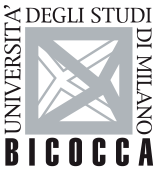

The goal of today's lecture is to learn how to numerically calculate a probability distribution function from a finite set of events and to characterize the uncertainties associated with this measurement.

These two concepts are fundamentally important in astronomy and science in general.

This is because there are countless experiments and observations in which one needs to characterize the frequency of a given event occurring. For instance, questions such as: How common is the Sun? What exposure time is required to observe stars of a given brightness? How uniform is the distribution of galaxies? How do structures form in the Universe?—all of these are answered by studying distribution functions.

Secondly, measurements always have associated uncertainties. These arise from intrinsic limitations of the instruments or from the finite size of the available sample.

Sensible questions to ask include: How many Sun-like stars can we expect to find in a given volume of the Andromeda Galaxy? To what degree is our Universe uniform on large scales? Assessing these questions quantitatively requires accounting for the uncertainties arising from the finite size of the studied samples.

This is why we will study how to numerically measure a distribution function, and how we can characterize the uncertainty.

## <font color='red'> Distribution Functions </font>
### <font color='red'> Worked Example - The Gaussian Probability Density Function </font>

As a worked example, we will use the Gaussian Probability Density Function, which describes the probability of drawing a number $x$
around a given mean, and *rms* dispersion $\sigma$.

$f(x) = \displaystyle\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-x_0)^2}{2\sigma^2}}$

In [1]:
def Gaussian(x, x0=0, sigma=1):
  return 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(2*sigma**2))

We plot this function as follows:

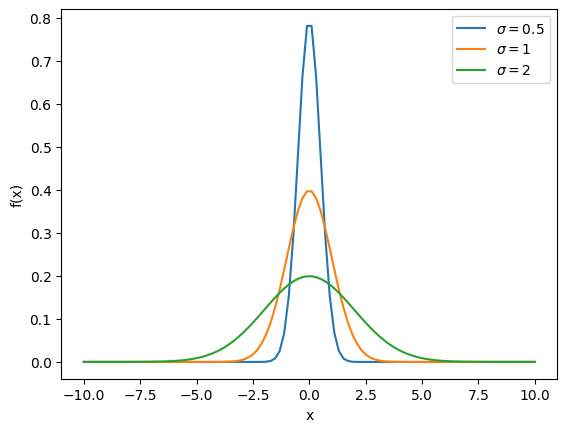

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
plt.plot(x, Gaussian(x, sigma=0.5), label=r'$\sigma=0.5$')
plt.plot(x, Gaussian(x, sigma=1), label=r'$\sigma=1$')
plt.plot(x, Gaussian(x, sigma=2), label=r'$\sigma=2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

As you may know from your previous Python course, we can draw random numbers using `NumPy`, distributed according to a Normal Distribution (i.e., a Gaussian of zero mean). For this, we use the function `np.random.normal()`

In [8]:
# Set the number of points
npoints = 1000

#Defining the seed allows us to draw the same random values every time we run this code
np.random.seed(12345)

#Draw the random numbers
xpoints = np.random.normal(size=npoints, scale=1)

How can we verify that these points are distributed following the expected Guassian Probability Density Function?

We can simply make the histogram of these points.

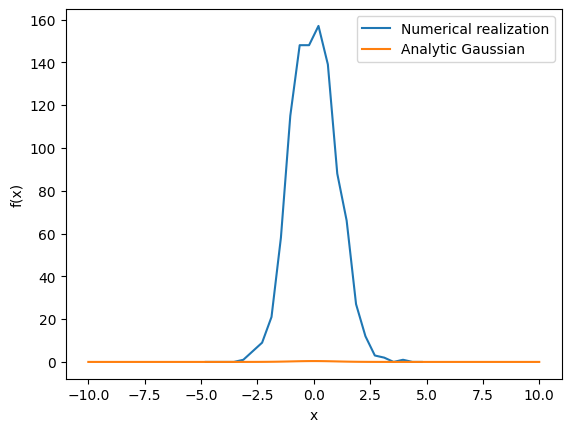

In [9]:
# Check the distribution of these points. For this we make a histogram
bins = np.linspace(-5,5,25)
histogram, bin_edges = np.histogram(xpoints, bins=bins)

#Define the bin midpoint
bin_mid = 0.5*(bin_edges[1:] + bin_edges[:-1])

#Plot the result using matplotlib
plt.plot(bin_mid, histogram, label='Numerical realization')
plt.plot(x, Gaussian(x), label='Analytic Gaussian')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Why is the measured histogram (blue) different from the analytical Normal Distribution (orange)?

The key difference is that a histogram is not a Probability Density Function (PDF).

A histogram represents the count of events in each bin, while the PDF describes the probability of an event occurring within that bin. Since the histogram depends on the total number of samples and bin width, it is not expected to match the analytical distribution.

**To align the histogram with the PDF, we must normalize the histogram, ensuring that the total area under the histogram sums to one.**. This makes it a probability distribution, comparable to the Normal PDF, as shown below:

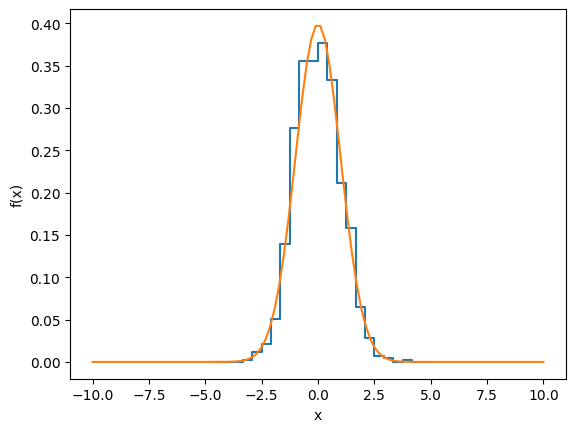

In [ ]:
#Set the number of points and generate random points sampled from a Gaussian Distribution
npoints = 1000
np.random.seed(12345)
xpoints = np.random.normal(size=npoints, scale=1)

# Check the distribution of these points. For this we make a histogram
# Note that density=True is needed for the integral to be 1 in this range.
bins = np.linspace(-5,5,25)
pdf, bin_edges = np.histogram(xpoints, bins=bins, density=True)

#Define the bin midpoint
bin_mid = 0.5*(bin_edges[1:] + bin_edges[:-1])

#Plot the result using matplotlib
plt.plot(bin_mid, pdf, ds='steps-mid')
plt.plot(x, Gaussian(x))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

## <font color='red'> What is the integral of the PDF?</font>

Using numerical integration with, e.g., `SciPy`, we can check whether the integral of the recovered distribution function is unity:

In [ ]:
from scipy import integrate

integral = integrate.trapezoid(pdf, bin_mid)
print("The integral of the numerical PDF is = %.3f"%integral)

The integral of the numerical PDF is = 1.000


# <font color='red'> Uncertainties in the recovered distribution function</font>

What is the uncertainty of the recovered distribution function for each bin?

We can gain some intuition about this by progressively binning the data into smaller and smaller intervals. For example:

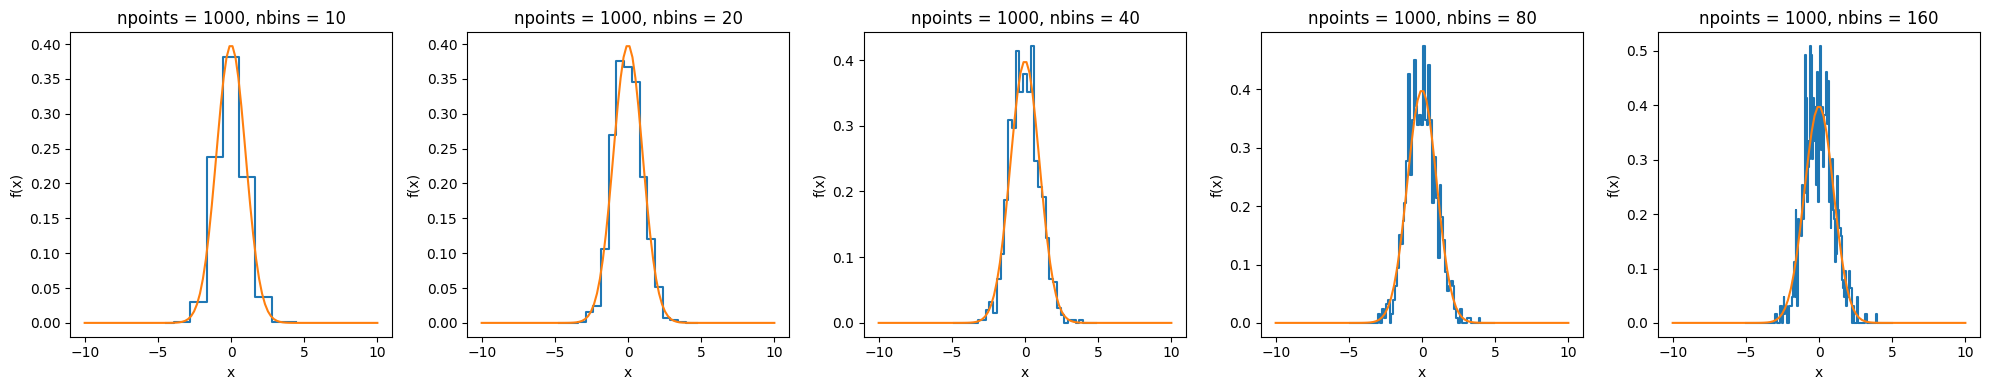

In [ ]:
# Step-1: Set the number of points and generate random points sampled from a Gaussian Distribution
npoints = 1000
np.random.seed(12345)
xpoints = np.random.normal(size=npoints, scale=1)

nbins = [10,20,40,80,160]
fig, axes = plt.subplots(figsize=(20,4), nrows=1, ncols=len(nbins))
for n in range(len(nbins)):
  bins = np.linspace(-5,5,nbins[n])
  pdf, bin_edges = np.histogram(xpoints, bins=bins, density=True)
  bin_mid = 0.5*(bin_edges[1:] + bin_edges[:-1])
  axes[n].plot(bin_mid, pdf, ds='steps-mid')
  axes[n].plot(x, Gaussian(x))
  axes[n].set_xlabel('x')
  axes[n].set_ylabel('f(x)')
  axes[n].set_title('npoints = %d, nbins = %d'%(npoints, nbins[n]))

plt.tight_layout()
plt.show()


We observe that, regardless of the number of bins used to estimate the Gaussian PDF, the PDF is, on average, well reconstructed. However, increasing the number of bins leads to higher noise. In other words, the uncertainty in the recovered PDF grows in per bin when increasing the number of bins, or equivalently, **it increases as the number of points per bin decreases.**

**How can we estimate the error?**

## <font color='red'> Poisson Errors </font>


In simple terms, when you're counting things, like how many events happen in a bin, the error in that count follows a **Poisson distribution**. A key property of this is that the *rms* uncertainty in the counts is the square root of the number you counted, $\sqrt{N}$.

So, if you count 100 events, the error is $\sqrt{100} = 10$. If you count 25 events, it is $\sim \sqrt{25} = 5$. This means the error gets larger for bigger counts. However, the error grows more slowly than the count itself, making the **relative error** decrease.

$\epsilon = \displaystyle\frac{\Delta N}{N} = \displaystyle\frac{N^{1/2}}{N} = \displaystyle\frac{1}{N^{1/2}}$.

Thefore, to decrease the error by a factor of 2, we would need to increase the number of counts by a factor of 4. Improving by a factor of 3 would require increase the counts by a factor of 9, and so on.

We can use this information to estimate the error we make for the desired number of bins.

For 20 bins and 100 random points, the uncertainties look as follows:

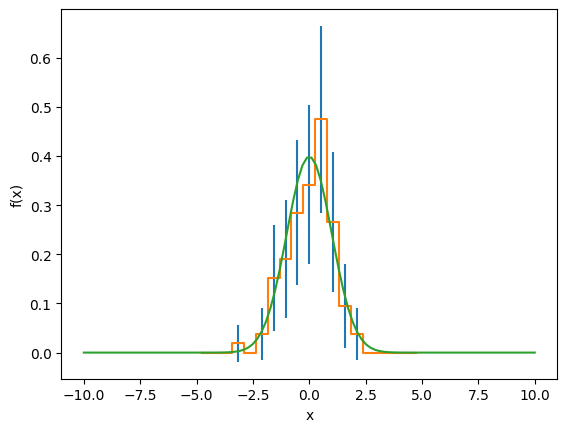

## <font color='pink'> Exercise 1

*   Using the NumPy function `np.histogram` with `density=False`, normalize the histogram output yourself and obtain the desired PDF.

*   Plot the distribution on top of the Gaussian function, including errors. The error of each bin is $N_{\rm bin}^{1/2}$, where $N_{\rm bin}$ is the number of data points in the bin.

*   Using `scipy.integrate.trapezoid` function, integrate the numeric PDF and check that the integral is 1.

An example solution is available here:
https://colab.research.google.com/drive/1C1zHpjPCzQ4FAAgjoFh_UaHPV3aMyevE?usp=sharing

In [ ]:
#===========================================
# Work on the Exercise 1 here
#===========================================














## <font color='pink'> Exercise 2 </font>

1. **Generate Random Numbers**  
   - Generate **10,000** random numbers between **0 and 1** using the function `np.random.rand()`.  

2. **Verify the Expected Fluctuation in Counts**  
   - Consider an interval of length $\Delta x<1/10$ within the range.  
   - Let $N_{\Delta x}$ be the expected number of points within this interval.  
   - Show that the typical fluctuation in the count of points (i.e., standard deviation) within $\Delta x$ follows Poission statistics. This means that:  
     
     $\Delta N_{\Delta x} = N_{\Delta x}^{1/2} = (\nu \Delta x)^{1/2}$

     where $\nu$ is the **linear number density**, defined as the total number of points divided by the length of the domain:  
       
     $\nu = \frac{N_{\text{total}}}{L}$
       
     In this case, $N_{\text{total}} = 10,000$ and the domain length is $L = 1$, so $\nu = 10,000$ points per unit length.  
  
3. Verify that the relative error is $\epsilon=\displaystyle\frac{\Delta N_{\Delta x}}{<N_{\Delta x}>} = \displaystyle\frac{1}{(\nu \Delta_x)^{1/2}}$. This means that although the total error in the counts increases with increasing bin width, the relative error decreases. Here $<N_{\Delta x}>$ is the mean number of points within an interval of length $\Delta x$.

**Hints**:

You can use the function `np.histogram()` to count the number of points in bins of varying sizes. Try using different number of bins (e.g., 20, 40, 80, 160, 320, 640, 1280), which correspond to different values of
$\Delta x$.

For each bin width, compute the root mean square (RMS) standard deviation of the counts across all bins using the function `np.std()` and compare it with the expected formula.

Finally, you can obtain $N_{\Delta x}$ calculating the mean of the counts across all bins using the function `np.mean()`, and compare it with the expected formula.

An example solution to this exercise is available here: https://colab.research.google.com/drive/1C1zHpjPCzQ4FAAgjoFh_UaHPV3aMyevE?usp=sharing

The Figure below shows an example solution:

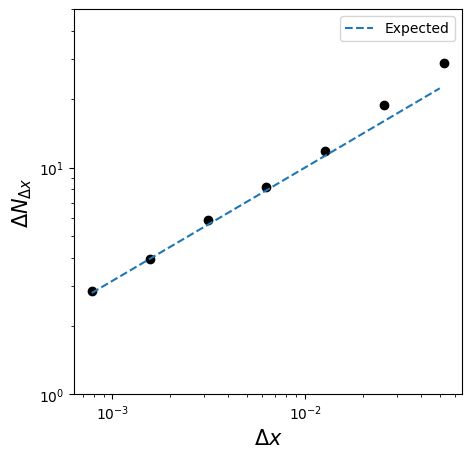

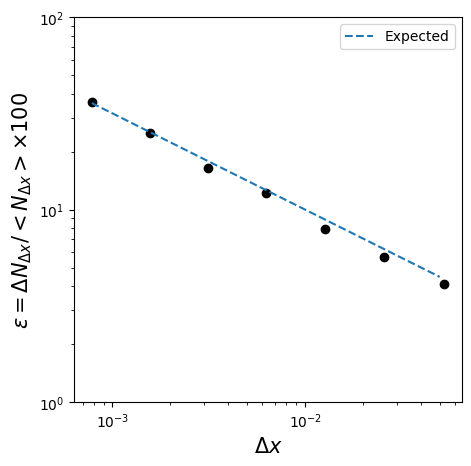

In [ ]:
#===========================================
# Work on the Exercise 2 here
#===========================================












